# Find bottom of heart level

This example show how to locate the slice on the top of the diaphragm with the debug images. We are also adding internal dataset with porcine CTs.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import os.path
import pytest
import os.path as op
import sys
import matplotlib.pyplot as plt
import scipy
import glob
from pathlib import Path
from datetime import datetime
import copy

sys.path.insert(0,str(Path("~/projects/io3d").expanduser()))
sys.path.insert(0,str(Path("~/projects/bodynavigation").expanduser()))

# import imtools.trainer3d
# import imtools.datasets
# import imtools.ml
import itertools
import io3d
import sed3
from loguru import logger
import numpy as np
import bodynavigation
import imma
from matplotlib import pyplot as plt
# logger.disable("io3d")
logger.remove()
logger.add(sys.stderr, level='INFO')


PyQt5 detected


1

# Get the distance from axial slide with the top of diaphragm

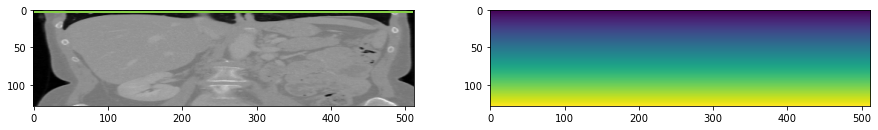

In [3]:
axcodes="SPL"
datap = io3d.datasets.read_dataset("3Dircadb1", "data3d",1, orientation_axcodes=axcodes)
bn = bodynavigation.body_navigation.BodyNavigation(datap.data3d, datap.voxelsize_mm)
dist = bn.dist_to_diaphragm_axial()

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(datap.data3d[:,256,:], cmap='gray')
plt.contour(dist[:,256,:]>0)
plt.subplot(122)
plt.imshow(dist[:,256,:])
plt.show()

In [4]:
# segmentation parameters
print(bn._diaphragm_level_min_dist_to_surface_mm)
print(bn._diaphragm_level_min_dist_to_sagittal_mm)
print(bn._lungs_max_density)
print(bn.axcodes)
print(bn._diaphragm_level_flat_area_proportion)

1
30
-200
SPL
0.9


# See the lungs expected area mask

In [5]:
def show_slice(datap, mask, ii):
    if (ii >= 0) & (ii < mask.shape[0]):
        plt.imshow(datap.data3d[ii,:,:], cmap='gray')
        plt.contour(mask[ii,:,:].astype(np.int))

In [6]:
# sensitivity analysis
# min_dist_to_sagittal_mm: if the size is too low, the maximum lungs surface will be just above the heart.


('3Dircadb1', 'data3d', 1)
(138, 195, 195)
slide=3, liver_slide=4.27906976744186, time=0:00:00.702591


C:\Users\Jirik\miniconda3\envs\io3d\lib\site-packages\ipykernel_launcher.py:68: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Jirik\miniconda3\envs\io3d\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for add

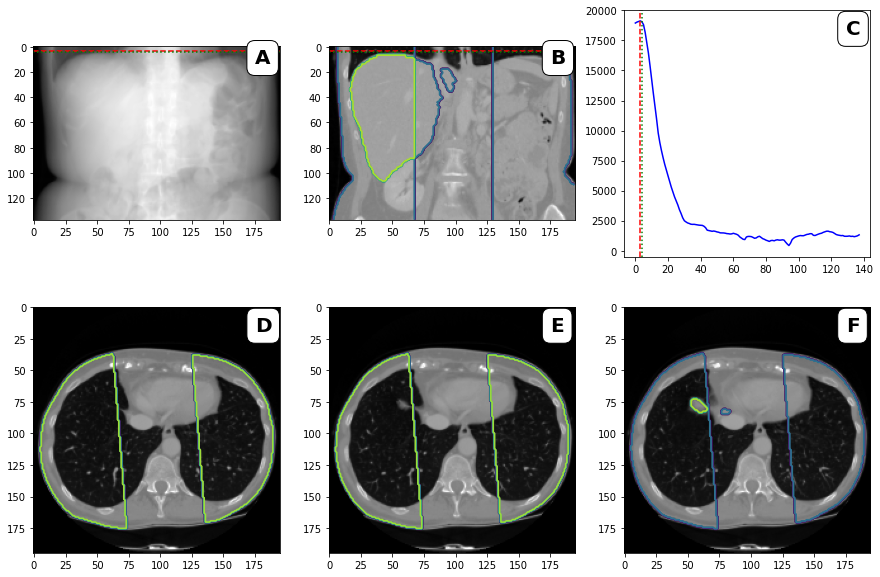

('3Dircadb1', 'data3d', 2)
(184, 267, 267)
slide=12, liver_slide=14.976744186046512, time=0:00:02.091212


C:\Users\Jirik\miniconda3\envs\io3d\lib\site-packages\ipykernel_launcher.py:68: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Jirik\miniconda3\envs\io3d\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for add

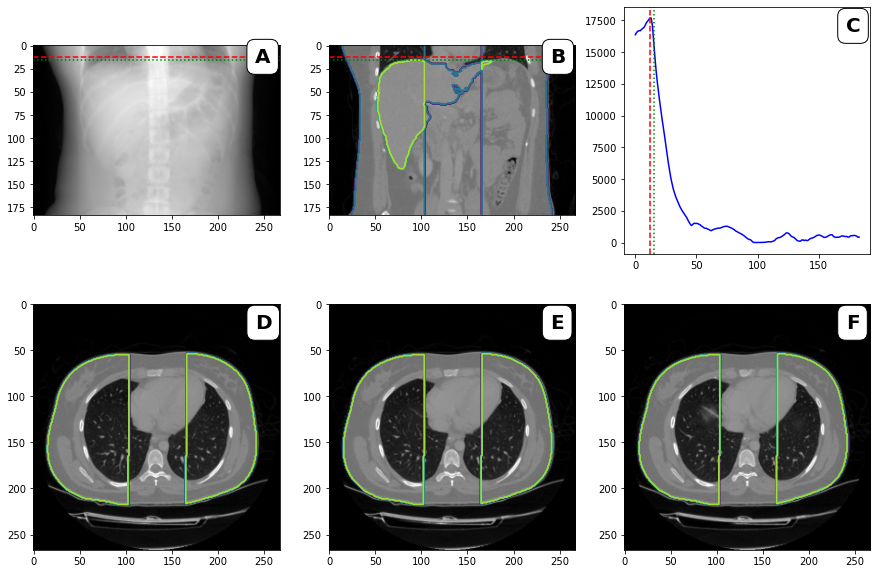

('3Dircadb1', 'data3d', 3)
(167, 214, 214)
slide=13, liver_slide=14.195, time=0:00:01.288179


C:\Users\Jirik\miniconda3\envs\io3d\lib\site-packages\ipykernel_launcher.py:68: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Jirik\miniconda3\envs\io3d\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for add

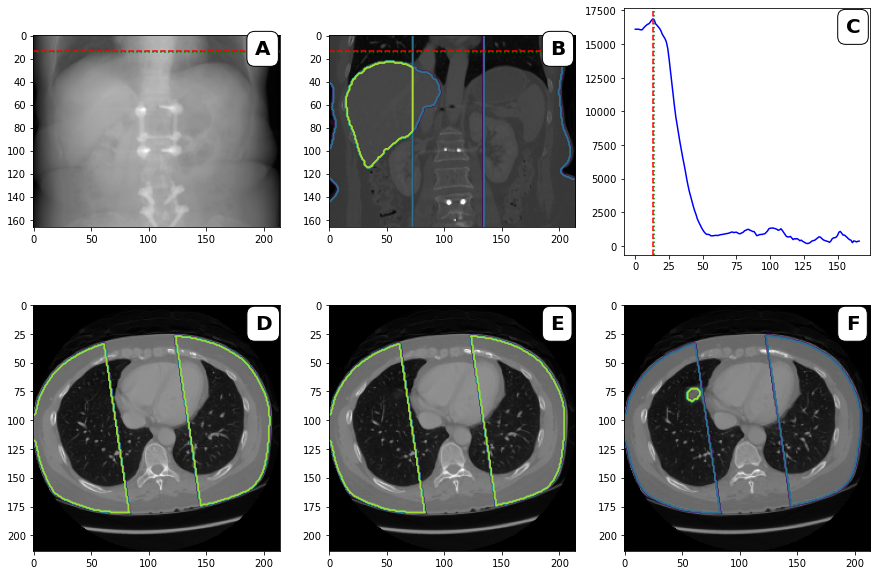

('sliver07', 'data3d', 1)
(183, 254, 254)
slide=12, liver_slide=14.0, time=0:00:02.001125


C:\Users\Jirik\miniconda3\envs\io3d\lib\site-packages\ipykernel_launcher.py:68: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Jirik\miniconda3\envs\io3d\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for add

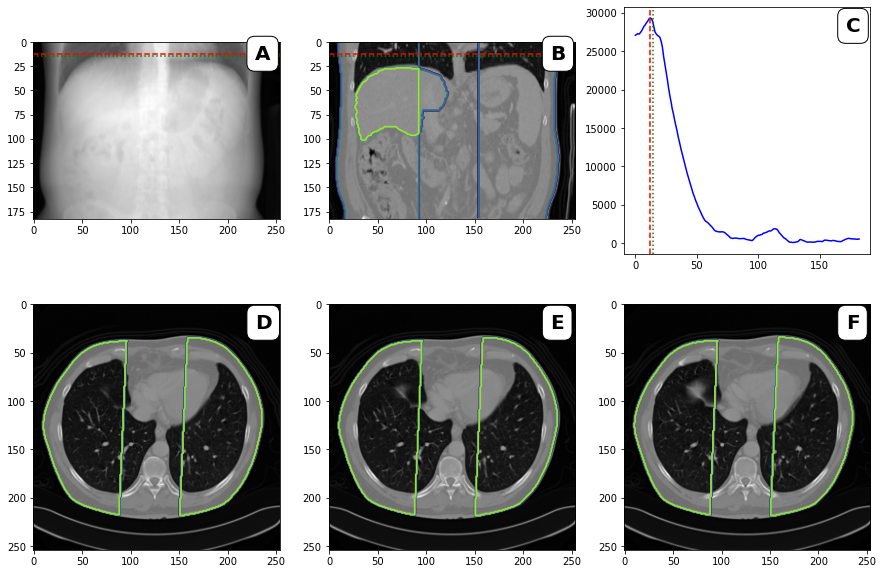

('sliver07', 'data3d', 2)
(128, 215, 215)
slide=0, liver_slide=2.0, time=0:00:00.859097


C:\Users\Jirik\miniconda3\envs\io3d\lib\site-packages\ipykernel_launcher.py:68: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Jirik\miniconda3\envs\io3d\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for add

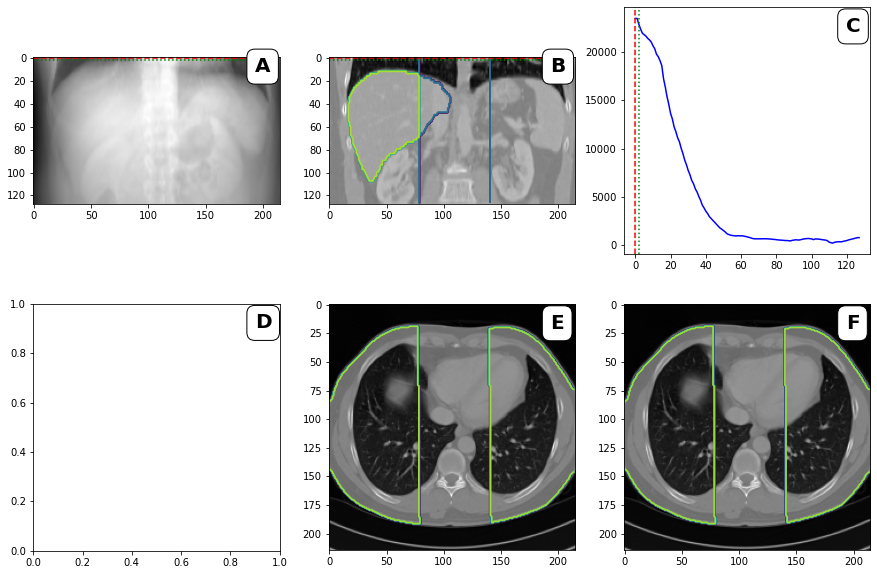

('sliver07', 'data3d', 3)
(158, 260, 260)
slide=8, liver_slide=10.0, time=0:00:01.676163


C:\Users\Jirik\miniconda3\envs\io3d\lib\site-packages\ipykernel_launcher.py:68: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Jirik\miniconda3\envs\io3d\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for add

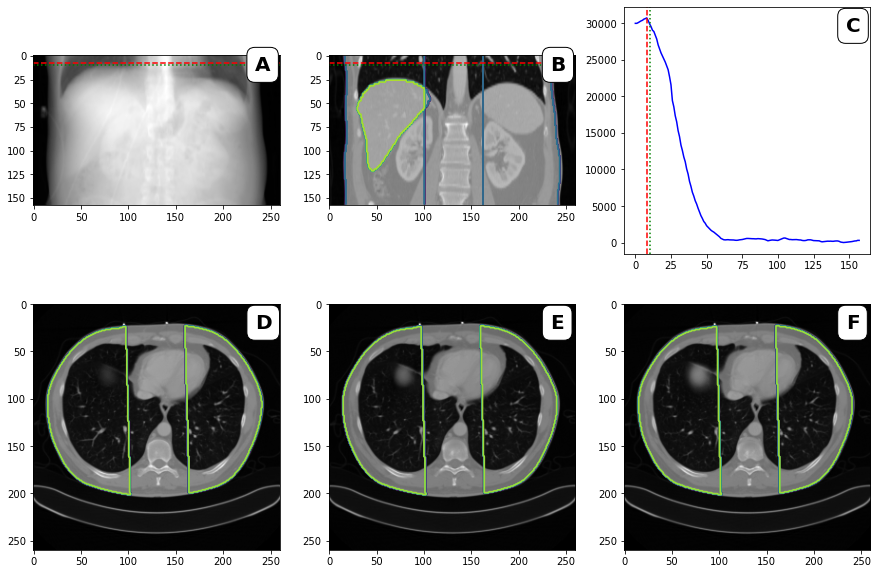

In [9]:
import string


for args in itertools.product(
    [
        "3Dircadb1", 
        'sliver07'
    ],
    ["data3d"], 
    range(1, 
          4
#           21
         )
):
    print(args)
    datap = io3d.datasets.read_dataset(*args, orientation_axcodes=axcodes)
    
    
    bn = bodynavigation.body_navigation.BodyNavigation(datap.data3d, datap.voxelsize_mm)
    
    # Warm up. Precalculation. The measured time will be not consumed for this steps.
    dst_surf = bn.dist_to_surface(return_in_working_voxelsize=True)
    dst_sagi = bn.dist_sagittal(return_in_working_voxelsize=True)
    
#     dst_coro = bn.dist_coronal()
    t1 = datetime.now()
    ii, mask, areas = bn.get_diaphragm_axial_position_index(
        return_in_working_voxelsize=True, return_mask=True, return_areas=True)

    t2 = datetime.now()
    
    args2 = list(copy.copy(args))
    args2[1] = 'liver'
    datap2 = io3d.datasets.read_dataset(*args2, orientation_axcodes=axcodes)
    
  
    datapr = io3d.DataPlus(data3d=bn.data3dr, voxelsize_mm=bn.working_vs)
    ii_liver = None
    mask = mask.astype(int) #+ maskc.astype(int)
    if datap2:
        mask_liver = imma.image.resize_to_shape(datap2.data3d, datapr.data3d.shape) > 0
        print(mask_liver.shape)
        mask += mask_liver.astype(int)
        ii_liver = np.min(np.nonzero(datap2.data3d)[0])
        # convert to voxelsize
        ii_liver = ii_liver * bn.data3dr.shape[0] / datap2.data3d.shape[0]
    print(f'slide={ii}, liver_slide={ii_liver}, time={t2-t1}')
    

    def draw_letter(ax, n):
            ax.text(.9, 0.9, string.ascii_uppercase[n], transform=ax.transAxes,
            size=20, weight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4')
            )
    
    plt.figure(figsize=(15, 10))
    axs = plt.subplot(231)
    draw_letter(axs, 0)
    plt.imshow(np.mean(datapr.data3d, axis=1), cmap="gray")
    plt.axhline(y=ii, color='r', linestyle='--')
    if datap2:
        plt.axhline(y=ii_liver, color='g', linestyle=':')
    
    
    axs = plt.subplot(232)
    draw_letter(axs, 1)
    plt.imshow(datapr.data3d[:,int(datapr.data3d.shape[1]/2),:], cmap='gray')
    plt.contour(mask[:,int(datapr.data3d.shape[1]/2),:].astype(np.int))
    plt.axhline(y=ii, color='r', linestyle='--')
    if datap2:
        plt.axhline(y=ii_liver, color='g', linestyle=':')

    axs = plt.subplot(233)
    draw_letter(axs, 2)

    
    plt.plot(areas, 'b-'
#          , mnsc, 'g-'
        )
    axs = plt.axvline(x=ii, color='r', linestyle='--')
    if datap2:
        plt.axvline(x=ii_liver, color='g', linestyle=':')


    axs = plt.subplot(234)
    draw_letter(axs, 3)
    show_slice(datapr, mask, ii-1)
    
    axs = plt.subplot(235)
    draw_letter(axs, 4)
    show_slice(datapr, mask, ii)

    axs = plt.subplot(236)
    draw_letter(axs, 5)
    show_slice(datapr, mask, ii + 1)

#     imshow(datap.data3d[ii,:,:], cmap='gray')
#     contour(mask[ii,:,:].astype(np.int))

    
    plt.savefig(
        "diaphragm_top_level_localization_" + "_".join(map(str, args))+ ".pdf",
        bbox_inches='tight'
    )
    plt.show()



